In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
pip install keras

In [80]:
pip install tensorflow

In [81]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/iris.csv'
iris = pd.read_csv(path)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris

In [83]:
iris = load_iris()
X = iris.data
y = iris.target

In [84]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model = Sequential()

model.add(Dense(3,activation='softmax'))
opt = SGD(lr=0.01)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
history = model.fit(X_train, y_train, batch_size=50, epochs=60, validation_data=(X_test, y_test))

Epoch 1/60
3/3 [==============================] - 1s 144ms/step - loss: 1.2951 - accuracy: 0.1417 - val_loss: 1.3140 - val_accuracy: 0.0333
Epoch 2/60
3/3 [==============================] - 0s 33ms/step - loss: 1.2847 - accuracy: 0.1417 - val_loss: 1.3033 - val_accuracy: 0.0333
Epoch 3/60
3/3 [==============================] - 0s 39ms/step - loss: 1.2743 - accuracy: 0.1417 - val_loss: 1.2928 - val_accuracy: 0.0333
Epoch 4/60
3/3 [==============================] - 0s 42ms/step - loss: 1.2639 - accuracy: 0.1417 - val_loss: 1.2826 - val_accuracy: 0.0667
Epoch 5/60
3/3 [==============================] - 0s 33ms/step - loss: 1.2542 - accuracy: 0.1417 - val_loss: 1.2723 - val_accuracy: 0.0667
Epoch 6/60
3/3 [==============================] - 0s 32ms/step - loss: 1.2445 - accuracy: 0.1417 - val_loss: 1.2621 - val_accuracy: 0.0667
Epoch 7/60
3/3 [==============================] - 0s 63ms/step - loss: 1.2345 - accuracy: 0.1417 - val_loss: 1.2522 - val_accuracy: 0.1000
Epoch 8/60
3/3 [==========

In [90]:
score = model.evaluate(X_train, y_train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

Train loss :  0.8529609441757202
Train accuracy :  0.7250000238418579


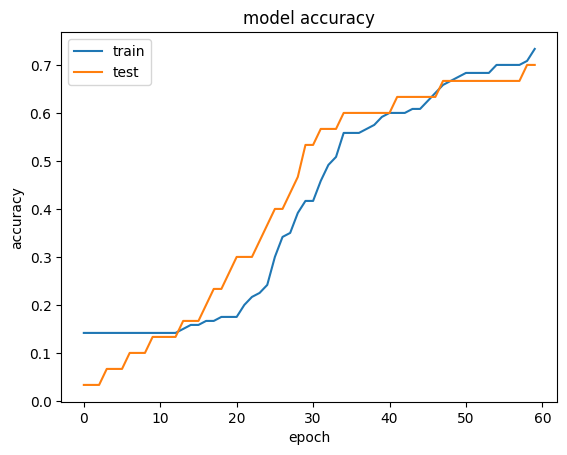

In [91]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [94]:
model.save("Iris_classifier.h5")
print("Saved model.")

Saved model.


In [92]:
pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=ad6e851d44a408e085e133b738e0a4be34a8518488be63558811629352a39d09
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [93]:
pip install graphviz

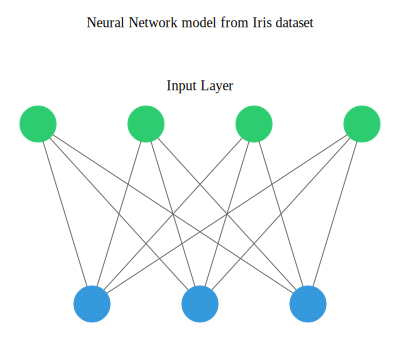

In [95]:
from ann_visualizer.visualize import ann_viz;
import graphviz
ann_viz(model,  filename='Iris_ann_model.gv',title=" Neural Network model from Iris dataset")
graph_file = graphviz.Source.from_file('Iris_ann_model.gv')
graph_file